In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
x_train[0].shape

(28, 28)

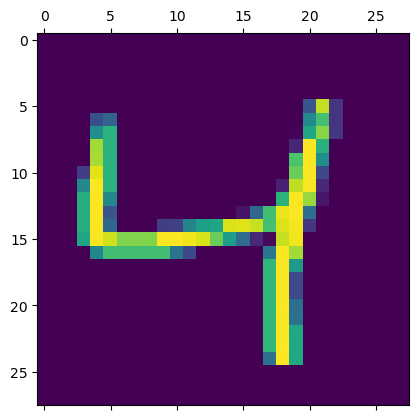

In [5]:
plt.matshow(x_train[2])
plt.show()

In [6]:
x_train=x_train/255
x_test=x_test/255
x_train1=x_train.reshape(len(x_train),28*28)

In [7]:
x_train1.shape

(60000, 784)

In [8]:
x_test1=x_test.reshape(len(x_test),28*28)
x_test1.shape

(10000, 784)

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
)            

In [11]:
model.fit(x_train1,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8144 - loss: 0.7200
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9150 - loss: 0.3055
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9216 - loss: 0.2854
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9229 - loss: 0.2728
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9265 - loss: 0.2678


In [12]:
model.evaluate(x_test1,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9170 - loss: 0.3032


[0.2659215033054352, 0.9277999997138977]

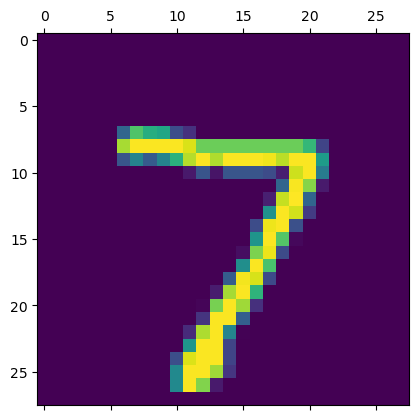

In [13]:
plt.matshow(x_test[0])
plt.show()

In [14]:
y=model.predict(x_test1)
y[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.36387199e-02, 3.04635250e-07, 7.83922300e-02, 9.68840182e-01,
       3.04669188e-03, 1.32741615e-01, 1.30296360e-06, 9.99752104e-01,
       1.13926545e-01, 6.39243841e-01], dtype=float32)

In [15]:
np.argmax(y[0])

7

In [16]:
y_test[:5]
y_predict=[np.argmax(i) for i in y]
y_predict[:5]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    2,    2,    0,    6,    9,    4,    3,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,    7,  930,   19,    9,    4,   11,   10,   35,    4],
       [   0,    0,   20,  934,    1,   19,    2,    9,   18,    7],
       [   1,    1,    4,    1,  918,    0,   11,    3,    9,   34],
       [   7,    2,    4,   38,   11,  772,   14,    5,   33,    6],
       [   8,    3,    5,    1,    8,    9,  920,    2,    2,    0],
       [   1,    6,   24,    8,   10,    1,    0,  943,    1,   34],
       [   4,    9,    7,   26,    9,   25,    9,    9,  867,    9],
       [   8,    7,    1,   14,   30,    4,    0,   15,    6,  924]])>

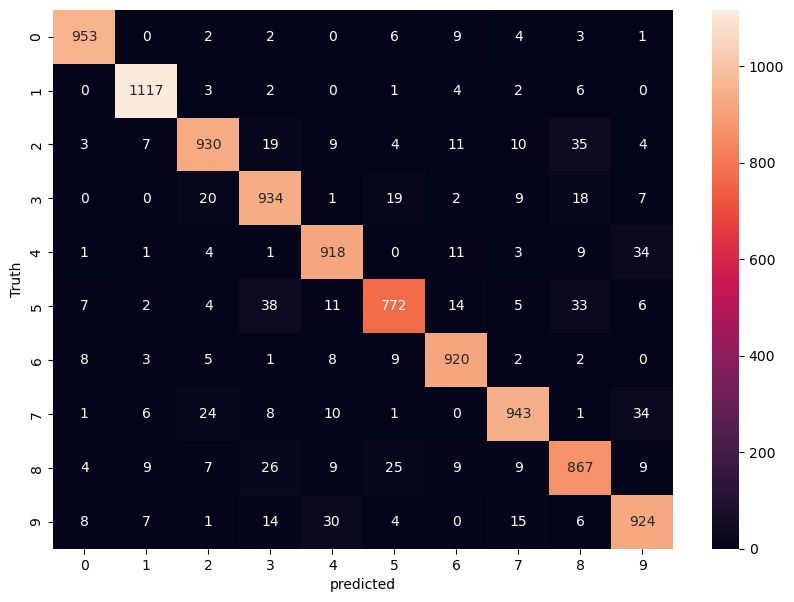

In [17]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

In [18]:
model1 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
)            

In [20]:
model1.fit(x_train1,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8674 - loss: 0.4609
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9615 - loss: 0.1340
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9723 - loss: 0.0912
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9810 - loss: 0.0635
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9849 - loss: 0.0505


In [21]:
model1.evaluate(x_test1,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.0923


[0.08012763410806656, 0.9742000102996826]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


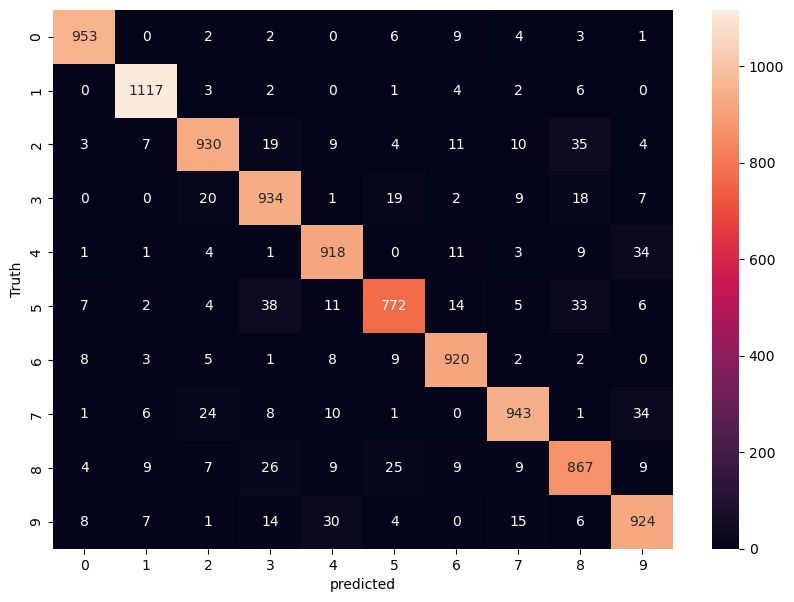

In [22]:
y=model1.predict(x_test1)
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict)
cm
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

In [23]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
)  

model1.fit(x_train,y_train,epochs=5)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8757 - loss: 0.4493
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9594 - loss: 0.1426
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9724 - loss: 0.0929
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9803 - loss: 0.0700
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9829 - loss: 0.0565


In [24]:
model1.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9668 - loss: 0.1064


[0.08763345330953598, 0.972599983215332]

In [60]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
)  
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model1.fit(x_train,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8742 - loss: 0.4497
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9624 - loss: 0.1292
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9750 - loss: 0.0843
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9800 - loss: 0.0631
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9854 - loss: 0.0478


In [62]:
 %load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 17668), started 0:09:47 ago. (Use '!kill 17668' to kill it.)